# Install Libraries and Dataset Importing

In [120]:
#importing libraries
import pandas as pd 
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
#importing the dataset
data = pd.read_csv("German credit risk.csv")

# Data Preparation and preprocessing

In [122]:
#checking the shape of the dataset
data.shape

(5000, 21)

In [123]:
#checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5000 non-null   object
 1   LoanDuration              5000 non-null   int64 
 2   CreditHistory             5000 non-null   object
 3   LoanPurpose               5000 non-null   object
 4   LoanAmount                5000 non-null   int64 
 5   ExistingSavings           5000 non-null   object
 6   EmploymentDuration        5000 non-null   object
 7   InstallmentPercent        5000 non-null   int64 
 8   Sex                       5000 non-null   object
 9   OthersOnLoan              5000 non-null   object
 10  CurrentResidenceDuration  5000 non-null   int64 
 11  OwnsProperty              5000 non-null   object
 12  Age                       5000 non-null   int64 
 13  InstallmentPlans          5000 non-null   object
 14  Housing                 

In [124]:
#checking how many unique values
data.nunique()

CheckingStatus                 4
LoanDuration                  59
CreditHistory                  5
LoanPurpose                   11
LoanAmount                  3354
ExistingSavings                5
EmploymentDuration             5
InstallmentPercent             6
Sex                            2
OthersOnLoan                   3
CurrentResidenceDuration       6
OwnsProperty                   4
Age                           53
InstallmentPlans               3
Housing                        3
ExistingCreditsCount           4
Job                            4
Dependents                     2
Telephone                      2
ForeignWorker                  2
Risk                           2
dtype: int64

In [125]:
#checking the duplicates values
data.duplicated().sum()

18

In [126]:
#remove the duplicates values
data=data.drop_duplicates()

In [127]:
data

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,...,savings_insurance,40,none,own,1,skilled,1,none,yes,No Risk
4996,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,...,car_other,32,bank,own,1,unemployed,1,none,yes,No Risk
4997,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,...,unknown,54,stores,own,2,unskilled,2,yes,yes,Risk
4998,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,...,savings_insurance,27,stores,own,1,skilled,1,none,yes,Risk


In [128]:
#checking the messing values
data.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

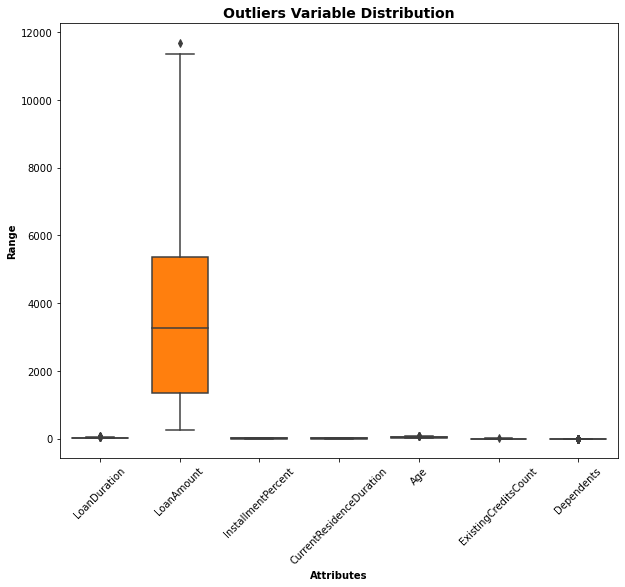

In [129]:
#checking the outliers
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data, orient="v", palette="tab10" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xticks(rotation=45)
plt.xlabel("Attributes", fontweight = 'bold');

In [130]:
#checking the statistical features of the dataset
data.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,21.455841,3491.815536,2.989562,2.859093,35.993577,1.467483,1.165195
std,11.133832,2485.122687,1.122801,1.114332,10.618910,0.565741,0.371393
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,13.000000,1345.500000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3250.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,30.000000,5358.750000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


In [131]:
#checking the names of the columns
data.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [132]:
#getting better understanding of the dataset and knowing what is the unique values
for i in data.columns:
    print(f"{i} count : {data[i].nunique()}")
    print(f"{data[i].unique()}\n")

CheckingStatus count : 4
['0_to_200' 'less_0' 'no_checking' 'greater_200']

LoanDuration count : 59
[31 18 15 28 32  9 16 11 35  5 27 29  4 33 39 13 34 23 10 25 20 26 21  7
 14 64  6 19 17 38  8 30 22 37 12 36 50 41 24 43 40 48 46 44 42 45 53 61
 51 63 47 54 49 60 59 56 62 57 52]

CreditHistory count : 5
['credits_paid_to_date' 'prior_payments_delayed' 'outstanding_credit'
 'all_credits_paid_back' 'no_credits']

LoanPurpose count : 11
['other' 'car_new' 'furniture' 'retraining' 'education' 'vacation'
 'appliances' 'car_used' 'repairs' 'radio_tv' 'business']

LoanAmount count : 3354
[1889  462  250 ... 6536 1597 4152]

ExistingSavings count : 5
['100_to_500' 'less_100' '500_to_1000' 'unknown' 'greater_1000']

EmploymentDuration count : 5
['less_1' '1_to_4' 'greater_7' '4_to_7' 'unemployed']

InstallmentPercent count : 6
[3 2 6 5 4 1]

Sex count : 2
['female' 'male']

OthersOnLoan count : 3
['none' 'co-applicant' 'guarantor']

CurrentResidenceDuration count : 6
[3 2 5 4 1 6]

OwnsPropert

In [133]:
# label encoding for the target column
label_encoder = preprocessing.LabelEncoder()
data['Risk']= label_encoder.fit_transform(data['Risk'])
data['Risk'].unique()

array([0, 1])

In [134]:
data

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,0
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,0
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,0
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,0
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,...,savings_insurance,40,none,own,1,skilled,1,none,yes,0
4996,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,...,car_other,32,bank,own,1,unemployed,1,none,yes,0
4997,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,...,unknown,54,stores,own,2,unskilled,2,yes,yes,1
4998,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,...,savings_insurance,27,stores,own,1,skilled,1,none,yes,1


In [135]:
# age groups labeling
data['Age_Group'] = np.nan
lst = [data]

for col in lst:
    col.loc[(col['Age'] >= 19) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
data.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,Age_Group
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,32,none,own,1,skilled,1,none,yes,0,Adults
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,37,stores,own,2,skilled,1,none,yes,0,Adults
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,28,none,own,2,skilled,1,yes,no,0,Young
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,32,none,own,1,skilled,1,none,yes,0,Adults
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,57,none,own,2,skilled,1,none,yes,1,Elder


In [136]:
# ExistingSavings groups labeling
data['ExistingSavings_Group'] = data["ExistingSavings"].map({'less_100':'little', '100_to_500':'moderate' ,"500_to_1000":"quite_rich" ,"greater_1000":'rich' })

In [137]:
# CheckingStatus groups labeling
data['CheckingStatus_Group'] = data["CheckingStatus"].map({'less_0':'fair', '0_to_200':'moderate' ,"greater_200":"rich" ,"no_checking":'no_checking' })

In [138]:
data

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,Age_Group,ExistingSavings_Group,CheckingStatus_Group
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,own,1,skilled,1,none,yes,0,Adults,moderate,moderate
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,own,2,skilled,1,none,yes,0,Adults,little,fair
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,own,2,skilled,1,yes,no,0,Young,little,fair
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,own,1,skilled,1,none,yes,0,Adults,little,moderate
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,own,2,skilled,1,none,yes,1,Elder,quite_rich,no_checking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,...,own,1,skilled,1,none,yes,0,Adults,little,rich
4996,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,...,own,1,unemployed,1,none,yes,0,Adults,rich,moderate
4997,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,...,own,2,unskilled,2,yes,yes,1,Senior,NaN,no_checking
4998,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,...,own,1,skilled,1,none,yes,1,Young,quite_rich,moderate


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            4982 non-null   object
 1   LoanDuration              4982 non-null   int64 
 2   CreditHistory             4982 non-null   object
 3   LoanPurpose               4982 non-null   object
 4   LoanAmount                4982 non-null   int64 
 5   ExistingSavings           4982 non-null   object
 6   EmploymentDuration        4982 non-null   object
 7   InstallmentPercent        4982 non-null   int64 
 8   Sex                       4982 non-null   object
 9   OthersOnLoan              4982 non-null   object
 10  CurrentResidenceDuration  4982 non-null   int64 
 11  OwnsProperty              4982 non-null   object
 12  Age                       4982 non-null   int64 
 13  InstallmentPlans          4982 non-null   object
 14  Housing                 

In [140]:
'''from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

city_ohe = OneHotEncoder(categories='auto')
city_feature_arr = city_ohe.fit_transform(data[['Age_Group']]).toarray()
city_feature_labels = city_ohe.categories_
city_features = pd.DataFrame(city_feature_arr, columns=city_feature_labels)
city_features'''

"from sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\n\ncity_ohe = OneHotEncoder(categories='auto')\ncity_feature_arr = city_ohe.fit_transform(data[['Age_Group']]).toarray()\ncity_feature_labels = city_ohe.categories_\ncity_features = pd.DataFrame(city_feature_arr, columns=city_feature_labels)\ncity_features"

# Label Encodin

In [141]:
categorical_cols = ['CheckingStatus_Group', 'CreditHistory', 'LoanPurpose', 'ExistingSavings_Group','EmploymentDuration','Sex','OthersOnLoan','OwnsProperty','InstallmentPlans','Housing','Job','ForeignWorker','Age_Group']
aa=pd.get_dummies(data, columns=categorical_cols)

aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CheckingStatus                        4982 non-null   object
 1   LoanDuration                          4982 non-null   int64 
 2   LoanAmount                            4982 non-null   int64 
 3   ExistingSavings                       4982 non-null   object
 4   InstallmentPercent                    4982 non-null   int64 
 5   CurrentResidenceDuration              4982 non-null   int64 
 6   Age                                   4982 non-null   int64 
 7   ExistingCreditsCount                  4982 non-null   int64 
 8   Dependents                            4982 non-null   int64 
 9   Telephone                             4982 non-null   object
 10  Risk                                  4982 non-null   int32 
 11  CheckingStatus_Group_fair     

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            4982 non-null   object
 1   LoanDuration              4982 non-null   int64 
 2   CreditHistory             4982 non-null   object
 3   LoanPurpose               4982 non-null   object
 4   LoanAmount                4982 non-null   int64 
 5   ExistingSavings           4982 non-null   object
 6   EmploymentDuration        4982 non-null   object
 7   InstallmentPercent        4982 non-null   int64 
 8   Sex                       4982 non-null   object
 9   OthersOnLoan              4982 non-null   object
 10  CurrentResidenceDuration  4982 non-null   int64 
 11  OwnsProperty              4982 non-null   object
 12  Age                       4982 non-null   int64 
 13  InstallmentPlans          4982 non-null   object
 14  Housing                 

In [143]:
bb= aa.drop(columns=["CheckingStatus","ExistingSavings","Age" ,"Telephone"])
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   LoanDuration                          4982 non-null   int64
 1   LoanAmount                            4982 non-null   int64
 2   InstallmentPercent                    4982 non-null   int64
 3   CurrentResidenceDuration              4982 non-null   int64
 4   ExistingCreditsCount                  4982 non-null   int64
 5   Dependents                            4982 non-null   int64
 6   Risk                                  4982 non-null   int32
 7   CheckingStatus_Group_fair             4982 non-null   uint8
 8   CheckingStatus_Group_moderate         4982 non-null   uint8
 9   CheckingStatus_Group_no_checking      4982 non-null   uint8
 10  CheckingStatus_Group_rich             4982 non-null   uint8
 11  CreditHistory_all_credits_paid_back   4982 

In [144]:
import openpyxl as xls

In [145]:
excel = pd.ExcelWriter("G3.credit_risk.xlsx")

In [146]:
data.to_excel(excel)

In [147]:
excel.save()

In [148]:
#RMF
#STANDERSCALER preprocessing 